####IMPORTS

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

####DADOS

In [ ]:
dados = pd.read_csv('dados.csv', sep = ';' )

#TIRAR OS DADOS INCONCLUSIVOS
dados = dados[dados['test_result'] != 'Inconclusivo']

# Trocando as variáveis
for coluna in dados.columns:
    dados[coluna] = dados[coluna].replace('f', 0)
    dados[coluna] = dados[coluna].replace('t', 1)

#TROCAR VARIAVEIS NO RESULTADO
a_trocar = {
    'Negativo':0,
    'Positivo':1
}
dados.test_result = dados.test_result.map(a_trocar)
dados.head()

,test_result,Gender,idade_anos,priority,CovidConfirmadoCasa,ProfissionalSaude,Febre,Tosse,DorGarganta,Coriza,...,Transplantado,GestacaoRisco,DoenteFigado,TratamentoImunossupressor,NA-Risco,Indicado,DataDosSintomas,SemanaEpidemiologica,DiasAteDiagnostico,Bairro
0,0,Masculino,30,A,1,0,1,1,1,0,...,0,0,0,0,0,1,10/06/2020 20:10,7,4,Meier - Rio De Janeiro - RJ
1,0,Feminino,24,A,0,1,0,1,1,1,...,0,0,0,0,0,0,10/06/2020 19:35,7,4,Inga - Niteroi - RJ
2,0,Masculino,52,A,1,0,1,1,0,1,...,0,0,0,0,1,1,01/06/2020 00:00,6,35,Parque Prazeres - Campos Dos Goytacazes - RJ
3,0,Feminino,37,A,1,1,0,1,1,0,...,0,0,0,0,1,1,28/06/2020 00:00,10,8,Centro - Duque De Caxias - RJ
4,1,Masculino,66,A,1,0,0,1,0,1,...,0,0,0,0,1,1,10/06/2020 19:41,7,4,Barra Da Tijuca - Rio De Janeiro - RJ


####TREINANDO

In [ ]:
sintomas = ['Febre','Tosse', 'DorGarganta', 'Coriza', 'Mialgia', 'Enjoo', 'Diarreia', 'PerdaOlfato','FaltaAr']
sintomas = dados[sintomas]
diagnostico = dados["test_result"]

#####LINEAR SVC SEM BALANCEAMENTO

In [ ]:
SEED = 411
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(sintomas, diagnostico, test_size = 0.25,
                                                         stratify = diagnostico)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

classificador = LinearSVC()
classificador.fit(treino_x, treino_y)
previsoes = classificador.predict(teste_x)

print('Resultado da classificação %.2f%%' %(classificador.score(teste_x,teste_y)*100))
y_true = teste_y
y_pred = previsoes
target_names = ['Negativo', 'Positivo']

resultado = classification_report(y_true, y_pred, target_names=target_names)
print(resultado)

Treinaremos com 48031 elementos e testaremos com 16011 elementos
Resultado da classificação 85.73%
              precision    recall  f1-score   support

    Negativo       0.86      1.00      0.92     13727
    Positivo       0.00      0.00      0.00      2284

    accuracy                           0.86     16011
   macro avg       0.43      0.50      0.46     16011
weighted avg       0.74      0.86      0.79     16011



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 23.52222222222222, 'predição'),
 Text(50.722222222222214, 0.5, 'real')]

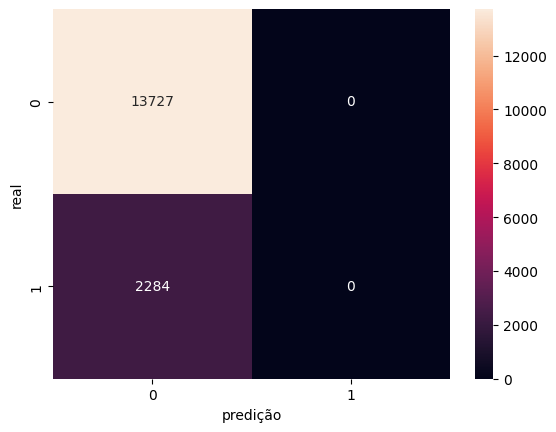

In [ ]:
confusao = confusion_matrix(teste_y, classificador.predict(teste_x))
sns.heatmap(confusao, annot = True, fmt = 'd').set(xlabel = 'predição', ylabel = "real")

#####OVERRSAMPLING

In [ ]:
SEED = 411
np.random.seed(SEED)

# Criar uma instância do RandomUnderSampler
oversampler = RandomOverSampler(random_state=SEED)

# Aplicar aos dados
sintomas_o, diagnostico_o = oversampler.fit_resample(sintomas, diagnostico)


treino_x_o, teste_x_o, treino_y_o, teste_y_o = train_test_split(sintomas_o, diagnostico_o, test_size = 0.25,
                                                         stratify = diagnostico_o)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x_o), len(teste_x_o)))

classificador = LinearSVC()
classificador.fit(treino_x_o, treino_y_o)
previsoes_o = classificador.predict(teste_x_o)

print('Resultado da classificação %.2f%%' %(classificador.score(teste_x_o,teste_y_o)*100))

y_true_o = teste_y_o
y_pred_o = previsoes_o
target_names = ['Negativo', 'Positivo']

resultado_o = classification_report(y_true_o, y_pred_o, target_names=target_names)
print(resultado_o)

Treinaremos com 82357 elementos e testaremos com 27453 elementos
Resultado da classificação 68.27%
              precision    recall  f1-score   support

    Negativo       0.66      0.76      0.71     13727
    Positivo       0.72      0.60      0.66     13726

    accuracy                           0.68     27453
   macro avg       0.69      0.68      0.68     27453
weighted avg       0.69      0.68      0.68     27453



[Text(0.5, 23.52222222222222, 'predição'),
 Text(50.722222222222214, 0.5, 'real')]

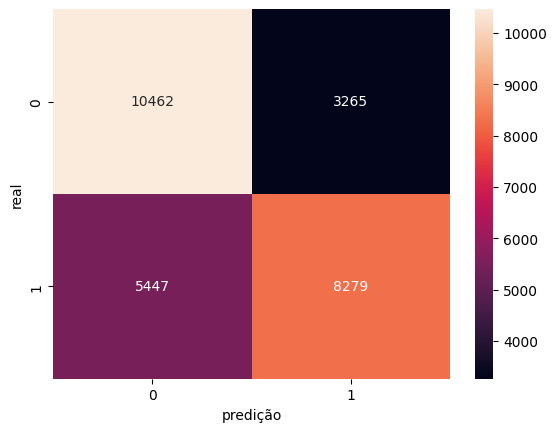

In [ ]:
confusao_o = confusion_matrix(teste_y_o, classificador.predict(teste_x_o))
sns.heatmap(confusao_o, annot = True, fmt = 'd').set(xlabel = 'predição', ylabel = "real")

#####UNDERSAMPLING

In [ ]:
SEED = 411
np.random.seed(SEED)

# Criar uma instância do RandomUnderSampler
undersampler = RandomUnderSampler(random_state=SEED)

# Aplicar aos dados
sintomas_u, diagnostico_u = undersampler.fit_resample(sintomas, diagnostico)


treino_x_u, teste_x_u, treino_y_u, teste_y_u = train_test_split(sintomas_u, diagnostico_u, test_size = 0.25,
                                                         stratify = diagnostico_u)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x_u), len(teste_x_u)))

classificador = LinearSVC()
classificador.fit(treino_x_u, treino_y_u)
previsoes_u = classificador.predict(teste_x_u)

print('Resultado da classificação %.2f%%' %(classificador.score(teste_x_u,teste_y_u)*100))

y_true_u = teste_y_u
y_pred_u = previsoes_u
target_names = ['Negativo', 'Positivo']

resultado_u = classification_report(y_true_u, y_pred_u, target_names=target_names)
print(resultado_u )

Treinaremos com 13705 elementos e testaremos com 4569 elementos
Resultado da classificação 68.02%
              precision    recall  f1-score   support

    Negativo       0.66      0.75      0.70      2285
    Positivo       0.71      0.61      0.66      2284

    accuracy                           0.68      4569
   macro avg       0.68      0.68      0.68      4569
weighted avg       0.68      0.68      0.68      4569



[Text(0.5, 23.52222222222222, 'predição'),
 Text(50.722222222222214, 0.5, 'real')]

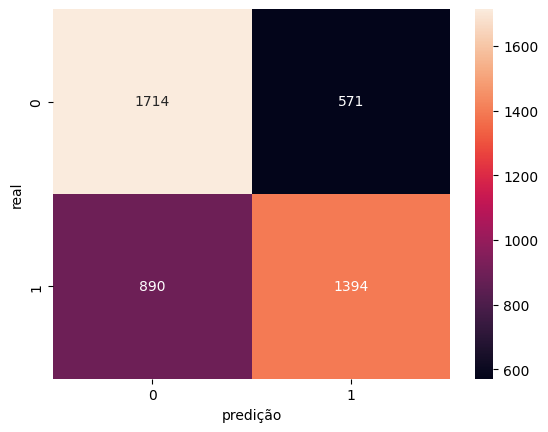

In [ ]:
confusao_u = confusion_matrix(teste_y_u, classificador.predict(teste_x_u))
sns.heatmap(confusao_u, annot = True, fmt = 'd').set(xlabel = 'predição', ylabel = "real")

#####COST SENSITIVE BALANCEADO

In [ ]:
SEED = 411
np.random.seed(SEED)
treino_x_c, teste_x_c, treino_y_c, teste_y_c = train_test_split(sintomas, diagnostico, test_size = 0.25,
                                                               stratify = diagnostico)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x_c), len(teste_x_c)))

classificador = LinearSVC(class_weight='balanced')
classificador.fit(treino_x_c, treino_y_c)
previsoes_c = classificador.predict(teste_x_c)
hiperplano = classificador.coef_

print('Resultado da classificação %.2f%%' %(classificador.score(teste_x_c,teste_y_c)*100))
y_true_c = teste_y_c
y_pred_c = previsoes_c
target_names = ['Negativo', 'Positivo']


resultado_c = classification_report(y_true_c, y_pred_c, target_names=target_names)
print(resultado_c)
print("Coeficientes do hiperplano separador:", hiperplano)

Treinaremos com 48031 elementos e testaremos com 16011 elementos
Resultado da classificação 73.91%
              precision    recall  f1-score   support

    Negativo       0.92      0.76      0.83     13727
    Positivo       0.30      0.61      0.40      2284

    accuracy                           0.74     16011
   macro avg       0.61      0.68      0.62     16011
weighted avg       0.83      0.74      0.77     16011

Coeficientes do hiperplano separador: [[ 0.21989818  0.08245868 -0.15545535 -0.08717816  0.11503058  0.05394372
  -0.02167148  0.62526888  0.15624703]]


In [ ]:
hiperplano = classificador.coef_
hiperplano

array([[ 0.21989818,  0.08245868, -0.15545535, -0.08717816,  0.11503058,
         0.05394372, -0.02167148,  0.62526888,  0.15624703]])

[Text(0.5, 23.52222222222222, 'predição'),
 Text(50.722222222222214, 0.5, 'real')]

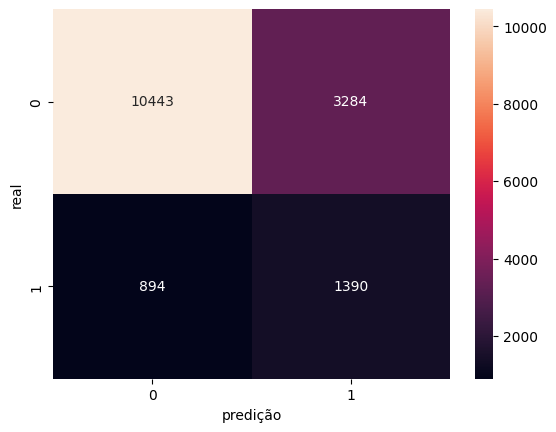

In [ ]:
confusao_c = confusion_matrix(teste_y_c, classificador.predict(teste_x_c))
sns.heatmap(confusao_c, annot = True, fmt = 'd').set(xlabel = 'predição', ylabel = "real")

##### KERNEL

In [ ]:
SEED = 411
np.random.seed(SEED)
treino_xk, teste_xk, treino_yk, teste_yk = train_test_split(sintomas, diagnostico, test_size = 0.25,
                                                            stratify = diagnostico)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_xk), len(teste_xk)))

classificador2 = SVC(kernel='rbf', class_weight='balanced')
classificador2.fit(treino_xk, treino_yk)
previsoes_k = classificador2.predict(teste_xk)

print('Resultado da classificação %.2f%%' %(classificador2.score(teste_xk,teste_yk)*100))

y_true_k = teste_yk
y_pred_k = previsoes_k
target_names = ['Negativo', 'Positivo']

resultado_k = classification_report(y_true_k, y_pred_k, target_names=target_names)
print(resultado_k)

Treinaremos com 48031 elementos e testaremos com 16011 elementos
Resultado da classificação 70.92%
              precision    recall  f1-score   support

    Negativo       0.93      0.72      0.81     13727
    Positivo       0.28      0.65      0.39      2284

    accuracy                           0.71     16011
   macro avg       0.60      0.69      0.60     16011
weighted avg       0.83      0.71      0.75     16011



[Text(0.5, 23.52222222222222, 'predição'),
 Text(50.722222222222214, 0.5, 'real')]

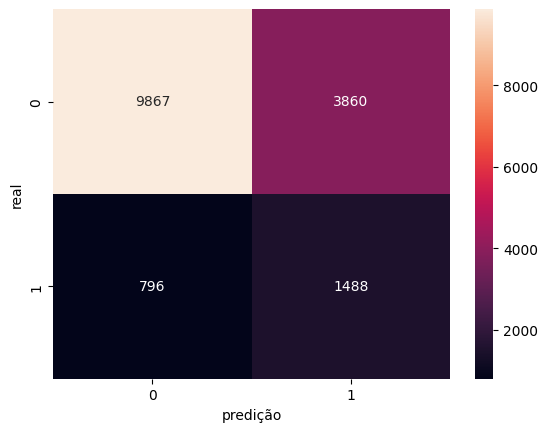

In [ ]:
confusao_k = confusion_matrix(teste_yk, previsoes_k)
sns.heatmap(confusao_k, annot = True, fmt = 'd').set(xlabel = 'predição', ylabel = "real")

####COMPARANDO RESULDADOS

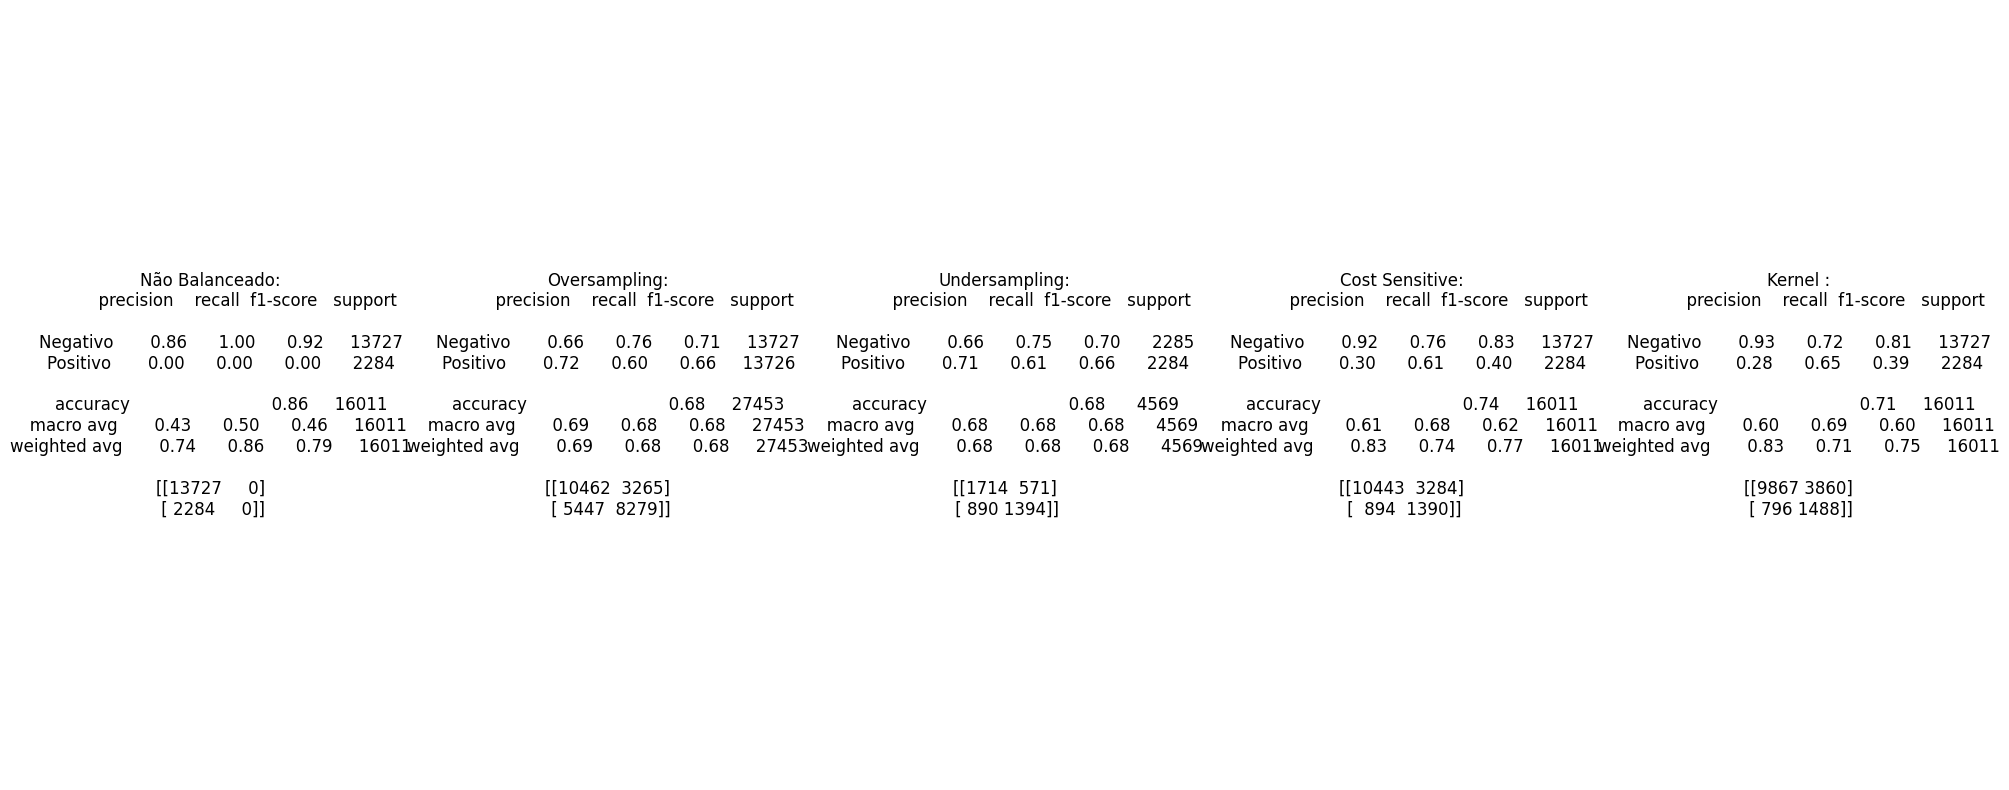

In [ ]:
# Concatenar os resultados e matrizes de confusão em uma única string
todos_resultados = [
    f"Não Balanceado:\n{resultado}\n{confusao}",
    f"Oversampling:\n{resultado_o}\n{confusao_o}",
    f"Undersampling:\n{resultado_u}\n{confusao_u}",
    f"Cost Sensitive:\n{resultado_c}\n{confusao_c}",
    f"Kernel :\n{resultado_k}\n{confusao_k}"
]

# Criar uma figura e eixos para a grade
fig, axs = plt.subplots(1, len(todos_resultados), figsize=(20, 8))

# Configurar os eixos para exibir texto
for i, ax in enumerate(axs):
    ax.text(0.5, 0.5, todos_resultados[i], fontsize=12, ha='center', va='center', wrap=True)
    ax.axis('off')

plt.tight_layout()
plt.show()

####DESVENDANDO DISTANCIAS

Valor Real
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Amostras, dtype: object

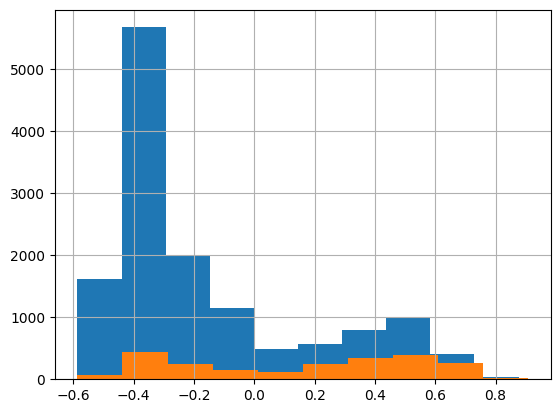

In [ ]:
# Calcular a distância para cada amostra no cost sensitive
distancias_c = classificador.decision_function(teste_x_c)
distancias_amostras = [(distancia, valor_real, valor_previsto) for distancia, valor_real, valor_previsto in zip(distancias_c, y_true_c, previsoes_c)]
df_distacia_amostras = pd.DataFrame(distancias_amostras, columns = ['Amostras', 'Valor Real', 'Valor previsto'])
#df_distacia_amostras
df_distacia_amostras.groupby("Valor Real").Amostras.hist()

In [ ]:
incorretas_positivas = [(distancia, valor_real, valor_previsto) for distancia, valor_real, valor_previsto in distancias_amostras if valor_real != valor_previsto and distancia > 0]
df_incorretas_positivas = pd.DataFrame(incorretas_positivas, columns=['Amostra', 'Valor Real', 'Valor Previsto'])
df_incorretas_positivas

,Amostra,Valor Real,Valor Previsto
0,0.298107,0,1
1,0.229830,0,1
2,0.302826,0,1
3,0.477580,0,1
4,0.417857,0,1
...,...,...,...
3279,0.302826,0,1
3280,0.257682,0,1
3281,0.060193,0,1
3282,0.142652,0,1


#####ERROS NEGATIVOS

In [ ]:
incorretas_negativas = [(distancia, valor_real, valor_previsto) for distancia, valor_real, valor_previsto in distancias_amostras if valor_real != valor_previsto and distancia < 0]
df_incorretas_negativas = pd.DataFrame(incorretas_negativas, columns=['Amostra', 'Valor Real', 'Valor Previsto'])
df_incorretas_negativas

,Amostra,Valor Real,Valor Previsto
0,-0.322443,1,0
1,-0.367587,1,0
2,-0.322443,1,0
3,-0.322443,1,0
4,-0.294890,1,0
...,...,...,...
889,-0.147689,1,0
890,-0.013905,1,0
891,-0.322443,1,0
892,-0.212131,1,0


##### HISTOGRAMA VALORES REAL = 0

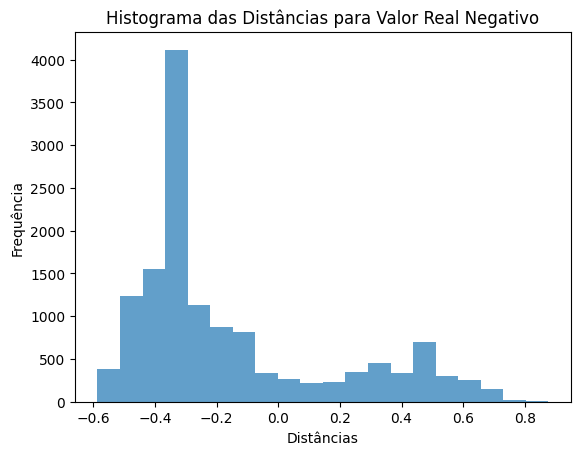

In [ ]:
amostras_negativas = df_distacia_amostras[df_distacia_amostras['Valor Real'] == 0]
distancias_negativas = amostras_negativas['Amostras']

# Criar o histograma das distâncias
plt.hist(distancias_negativas, bins=20, alpha=0.7)
plt.xlabel('Distâncias')
plt.ylabel('Frequência')
plt.title('Histograma das Distâncias para Valor Real Negativo')
plt.savefig('histograma_distancias_valor_real_negativo.png')
plt.show()

##### HISTOGRAMA VALORES REAL = 1

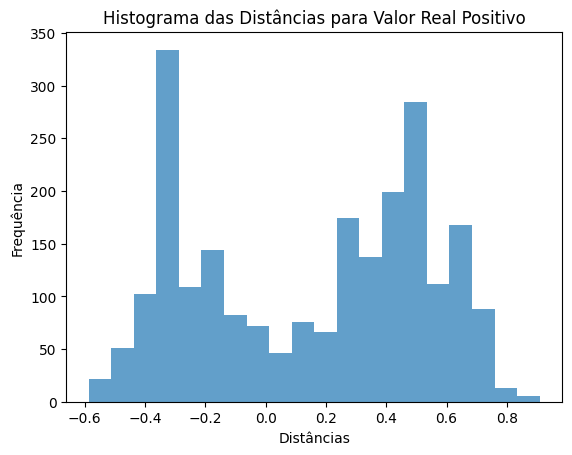

In [ ]:
amostras_positivas = df_distacia_amostras[df_distacia_amostras['Valor Real'] == 1]
distancias_positivas = amostras_positivas['Amostras']

# Criar o histograma das distâncias
plt.hist(distancias_positivas, bins=20, alpha=0.7)
plt.xlabel('Distâncias')
plt.ylabel('Frequência')
plt.title('Histograma das Distâncias para Valor Real Positivo')
plt.savefig('histograma_distancias_valor_real_positivo.png')
plt.show()